# Tree Regression and Gradient Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

### Example revisited

In [2]:
# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('diabetes.csv')
df.head()

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,F,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,M,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,F,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,M,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,M,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Separate out features from target.

In [3]:
Xdf = df.iloc[:,:-1]
Xdf.head()

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU
0,59,F,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,M,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,F,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,24,M,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,M,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


# Label Encoding

![](images/label-encoding.png)

# One-Hot Encoding

![](images/one-hot-encoding.png)

One-Hot encoding with `pandas`.

In [88]:
Xdf2 = pd.get_dummies(Xdf)
Xdf2.head()

,AGE,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,SEX_F,SEX_M
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1,0
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0,1
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1,0
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,0,1
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,0,1


Dummy variable trap (redundant feature information)

In [89]:
Xdf2 = pd.get_dummies(Xdf, drop_first=True)
Xdf2.head()

,AGE,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,SEX_M
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,0
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,1
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,0
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,1
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,1


One-Hot encoding with `sklearn`.

In [90]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
FM_ohe = ohe.fit_transform(df[['SEX']])
FM_ohe[:5,:]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [91]:
ohe = OneHotEncoder(sparse=False, drop='first')
FM_ohe = ohe.fit_transform(df[['SEX']])
FM_ohe[:5,:]

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.]])

# Tree Regressor

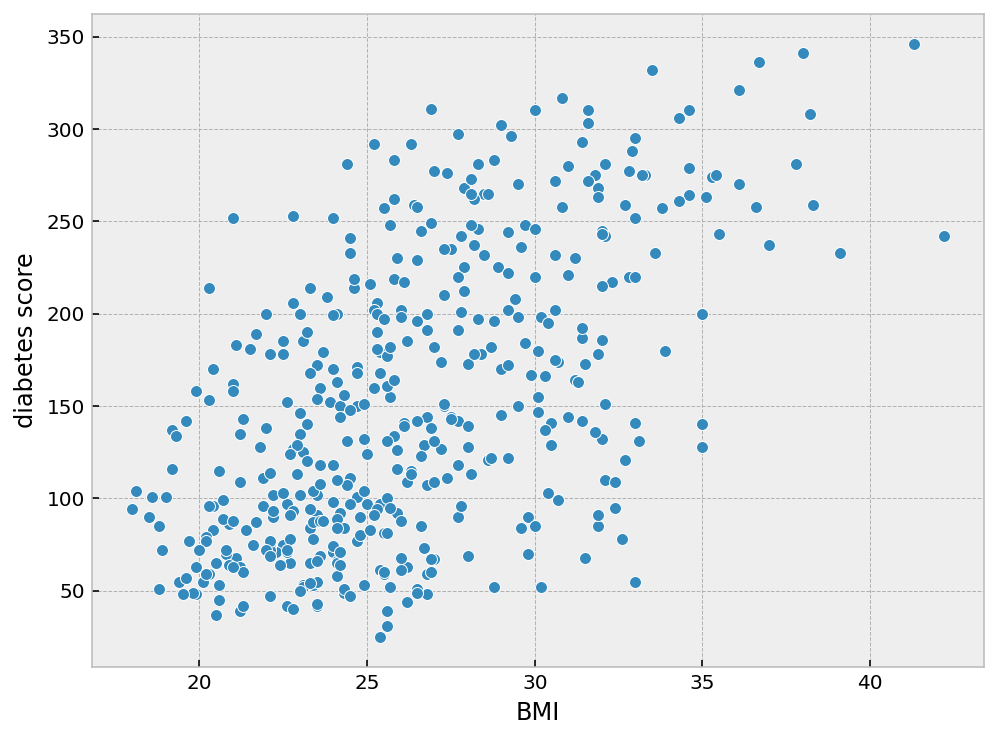

In [99]:
X = Xdf2[['BMI']].to_numpy()
y = df.DIS.to_numpy()

plt.plot(X, y,  'o')
plt.xlabel('BMI')
plt.ylabel('diabetes score');

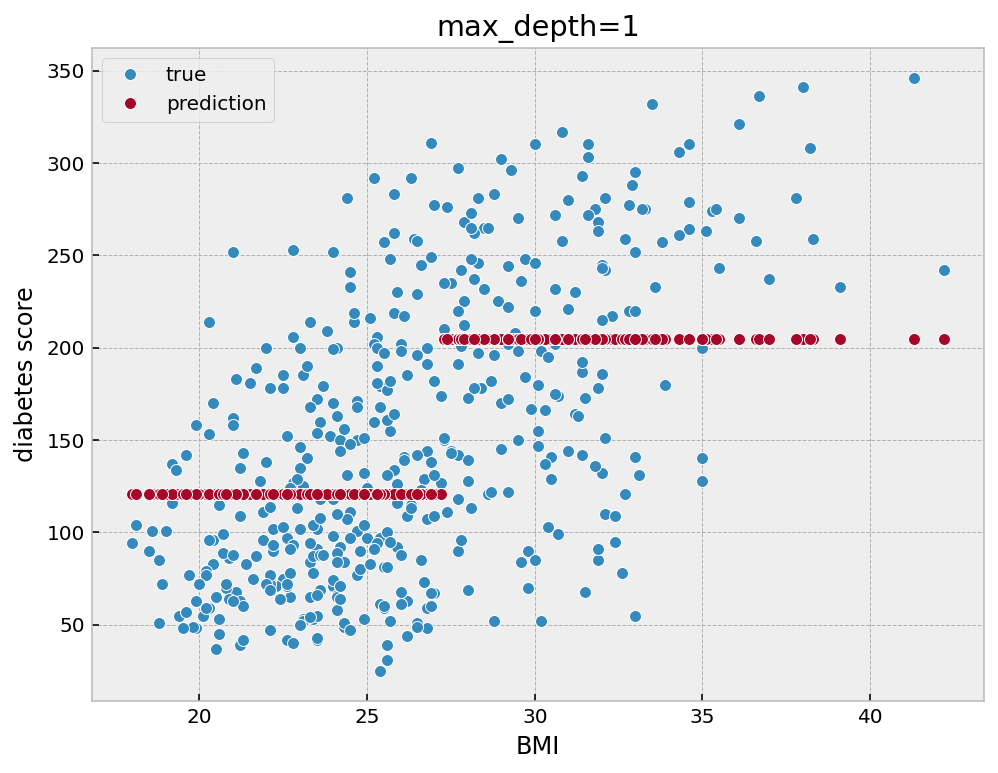

In [150]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=1, random_state=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score')
plt.title(f'max_depth={model.max_depth}')
plt.legend();

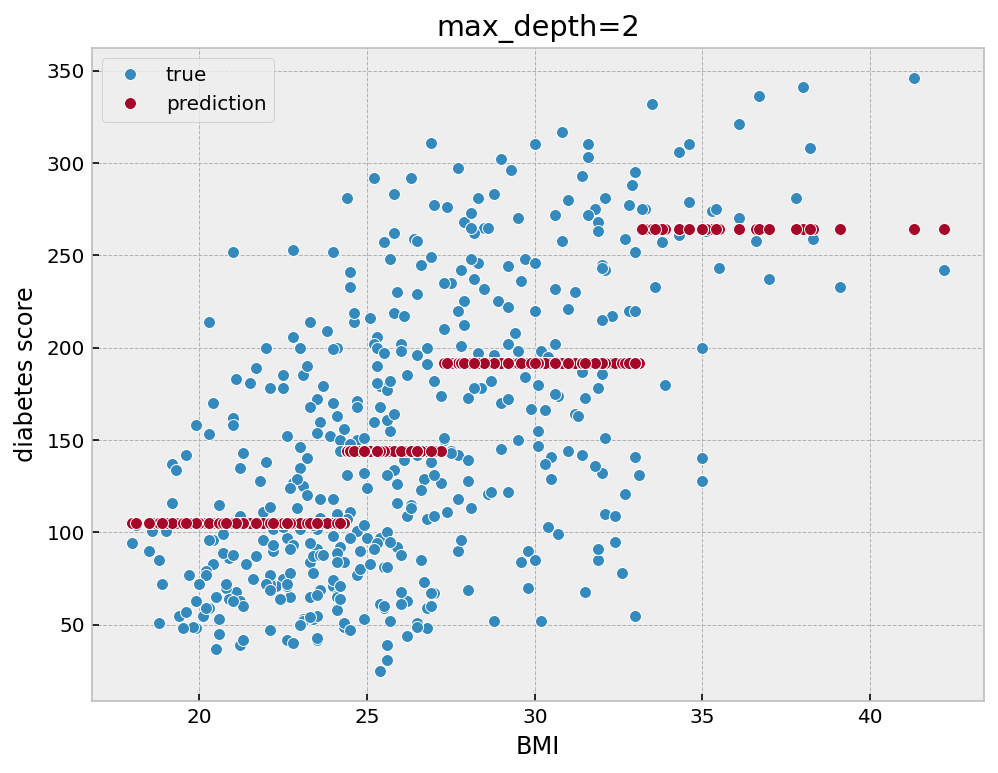

In [151]:
model = DecisionTreeRegressor(max_depth=2, random_state=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score')
plt.title(f'max_depth={model.max_depth}')
plt.legend();

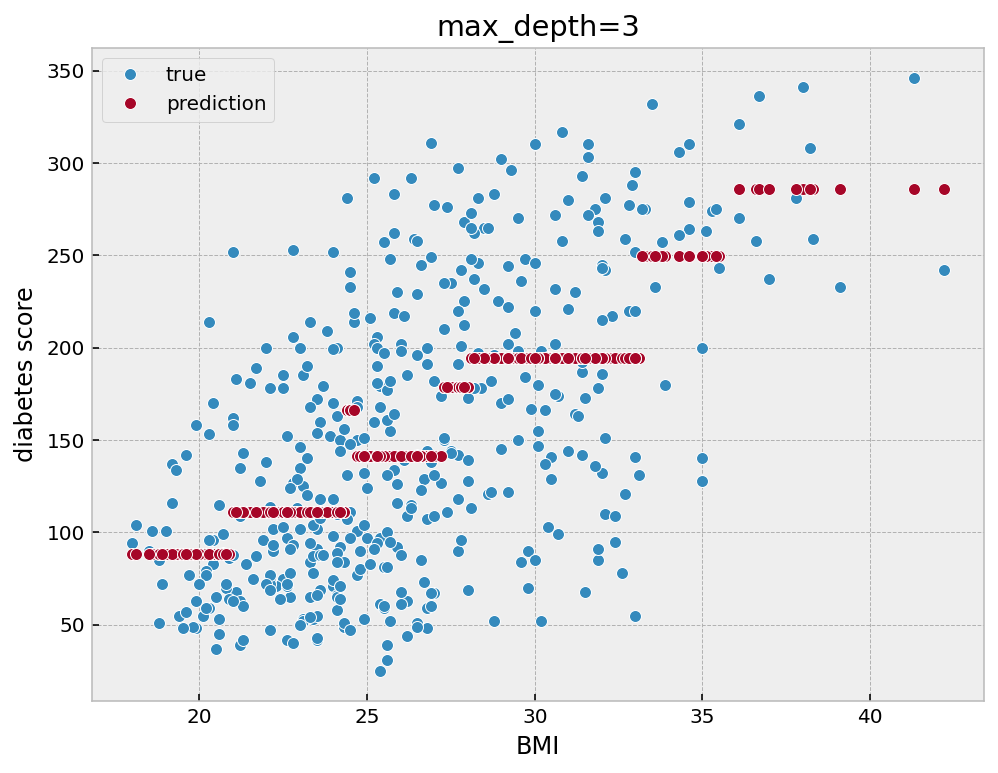

In [152]:
model = DecisionTreeRegressor(max_depth=3, random_state=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score')
plt.title(f'max_depth={model.max_depth}')
plt.legend();

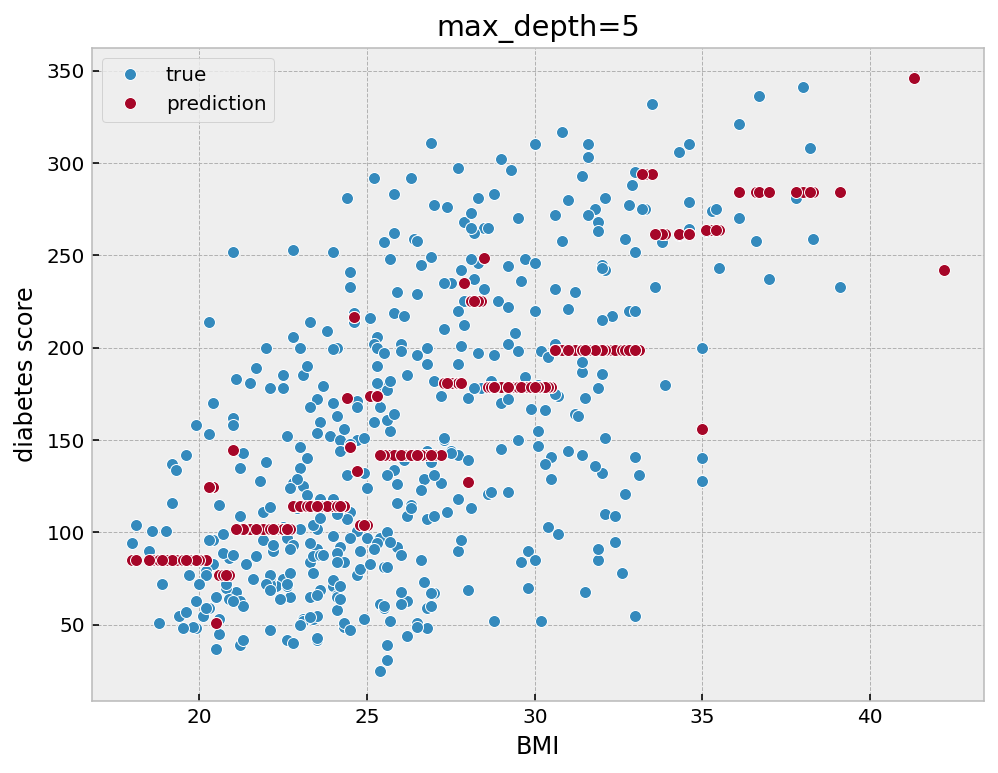

In [153]:
model = DecisionTreeRegressor(max_depth=5, random_state=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score')
plt.title(f'max_depth={model.max_depth}')
plt.legend();

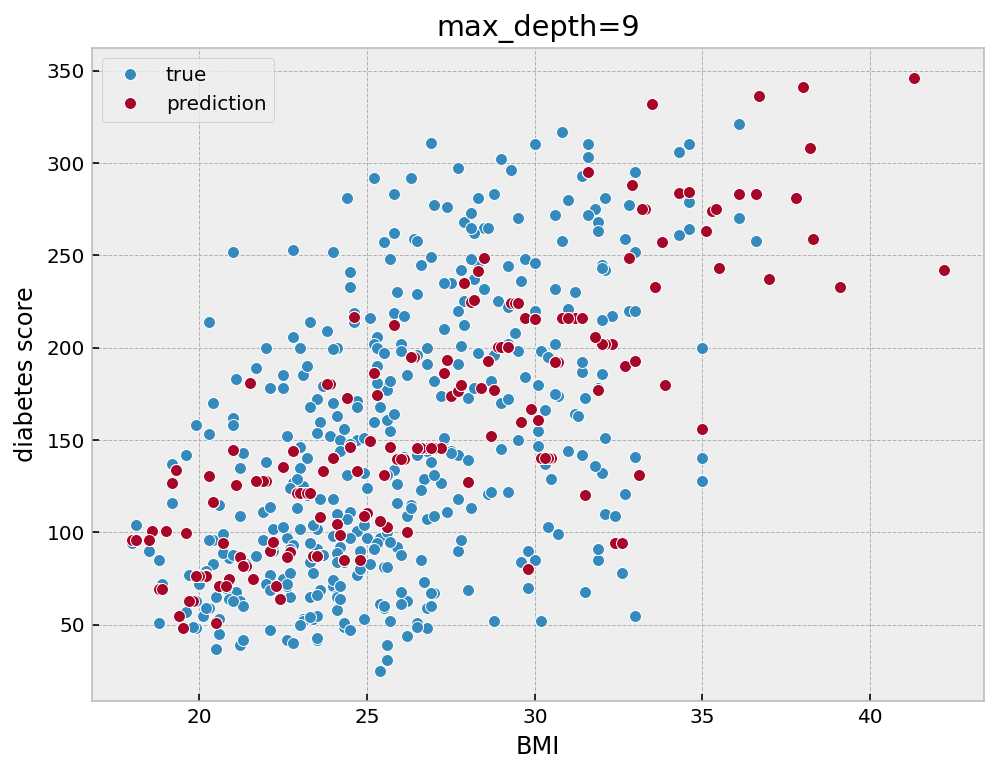

In [154]:
model = DecisionTreeRegressor(max_depth=9, random_state=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score')
plt.title(f'max_depth={model.max_depth}')
plt.legend();

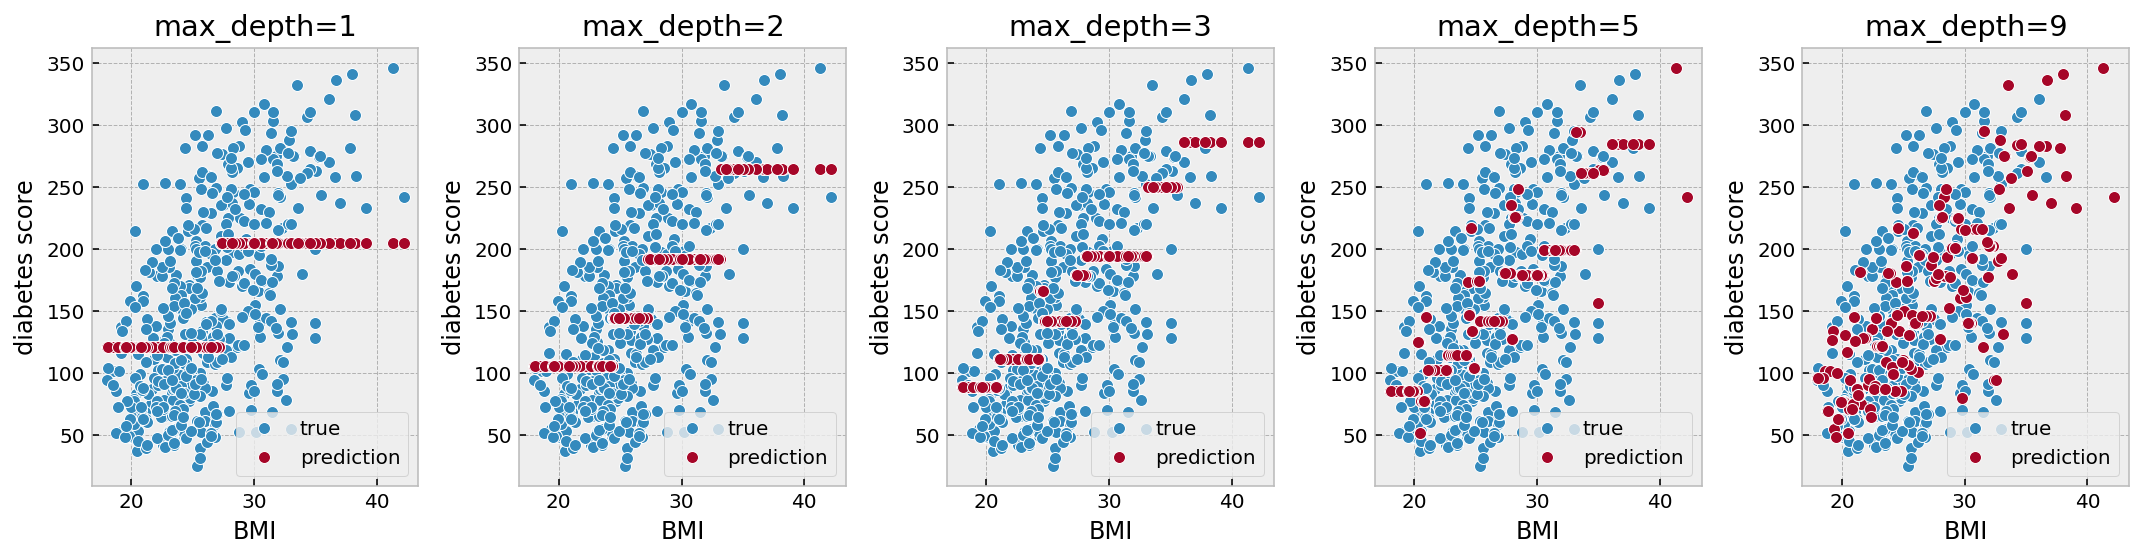

In [179]:
plt.figure(figsize=[15,4])
for i, md in enumerate([1, 2, 3, 5, 9]):
    model = DecisionTreeRegressor(max_depth=md, random_state=0)
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.subplot(1, 5, i+1)
    plt.plot(X, y,  'o', label='true')
    plt.plot(X, y_pred,  'o', label='prediction')
    plt.xlabel('BMI')
    plt.ylabel('diabetes score');
    plt.title(f'max_depth={model.max_depth}')
    plt.legend()
plt.tight_layout();

Tree depth is a hyperparameter that affects underfitting vs. overfitting (bias vs. variance).

![](images/tree-regression-vs-depth.png)

# Gradient Boosting

![](images/gradient-boosting-error.png)

![](images/gradient-boost-example.png)

![](images/gradient-boosting-performance.png)

Bagging vs. Boosting

![](images/bagging-vs-boosting.png)

# XGBoost

eXtreme Gradient Boosting

`conda install -c conda-forge xgboost`

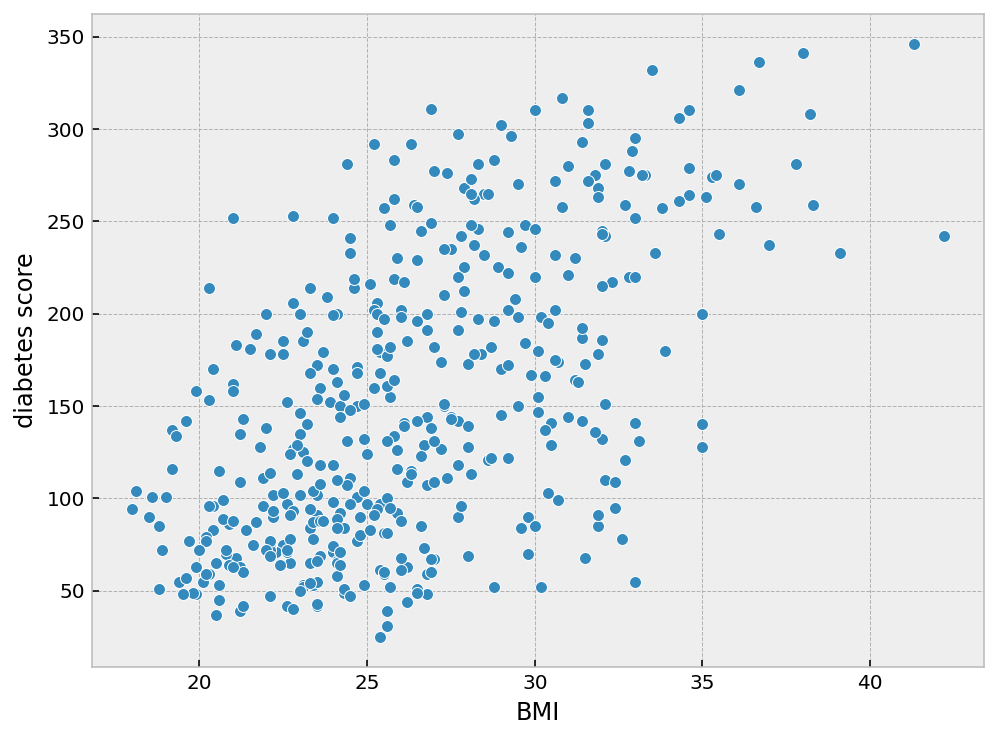

In [180]:
X = Xdf2[['BMI']].to_numpy()
y = df.DIS.to_numpy()

plt.plot(X, y,  'o')
plt.xlabel('BMI')
plt.ylabel('diabetes score');

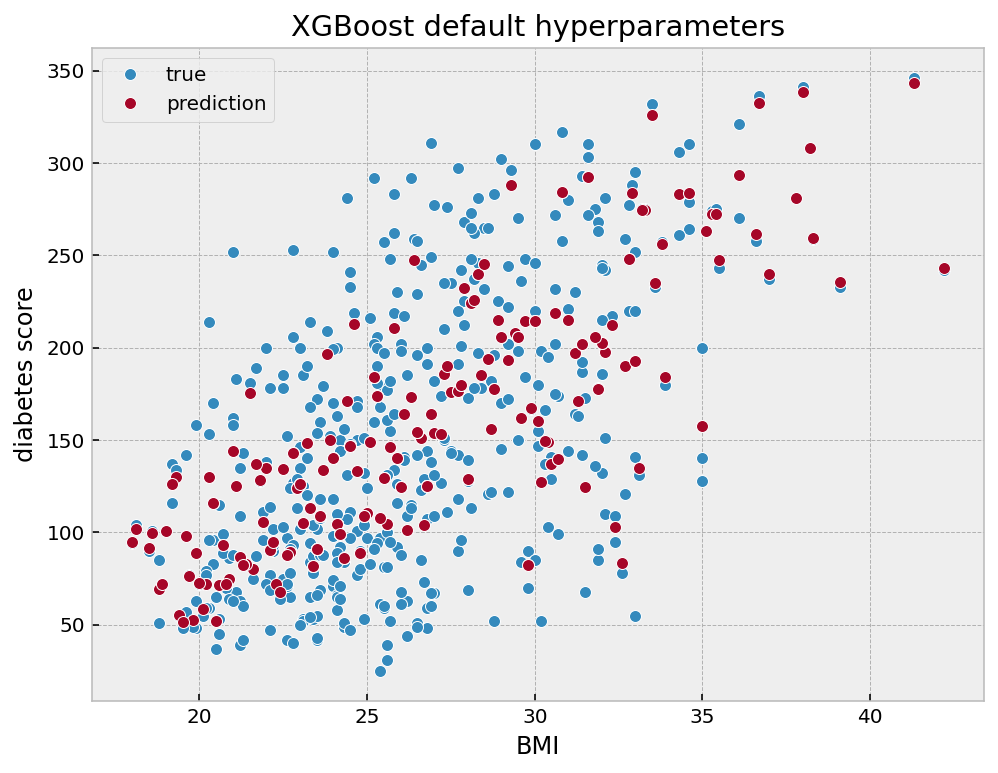

In [181]:
from xgboost import XGBRegressor

model = XGBRegressor(seed=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score');
plt.title('XGBoost default hyperparameters')
plt.legend();

### Learning rate

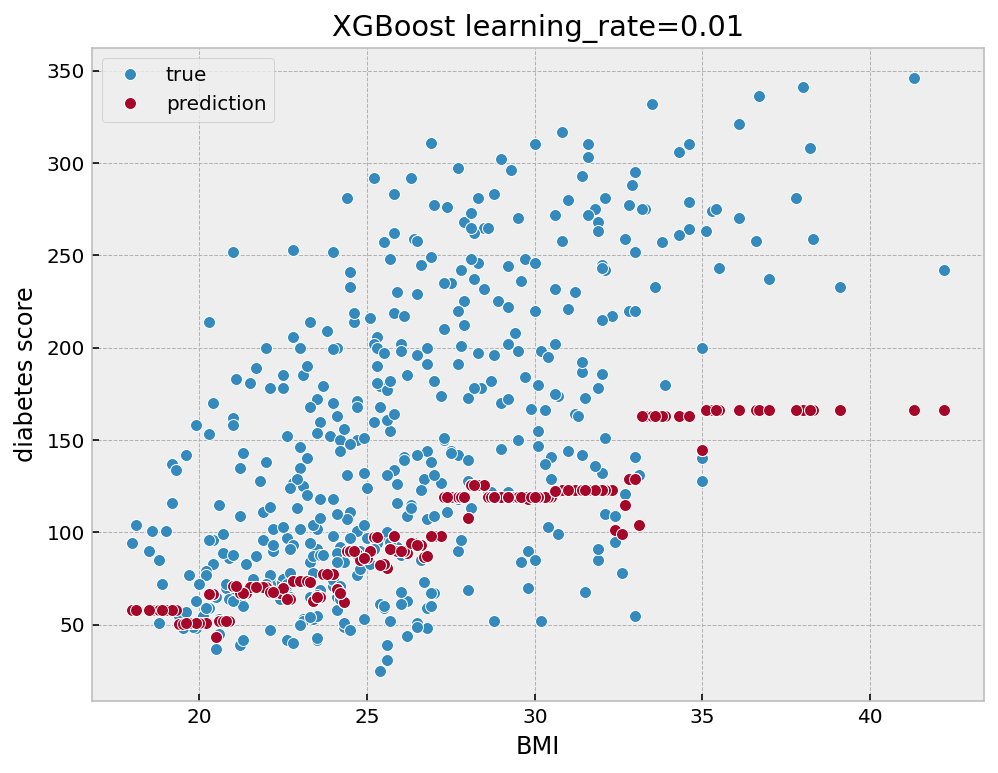

In [182]:
model = XGBRegressor(learning_rate=0.01, seed=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score');
plt.title(f'XGBoost learning_rate={model.learning_rate}')
plt.legend();

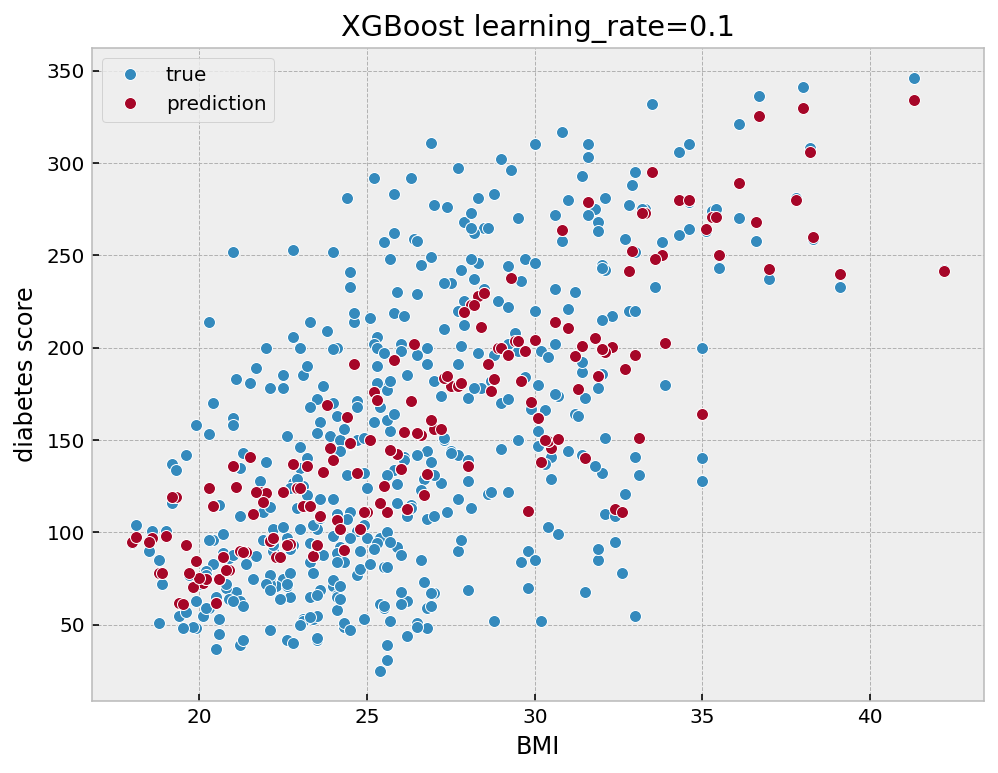

In [183]:
model = XGBRegressor(learning_rate=0.1, seed=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score');
plt.title(f'XGBoost learning_rate={model.learning_rate}')
plt.legend();

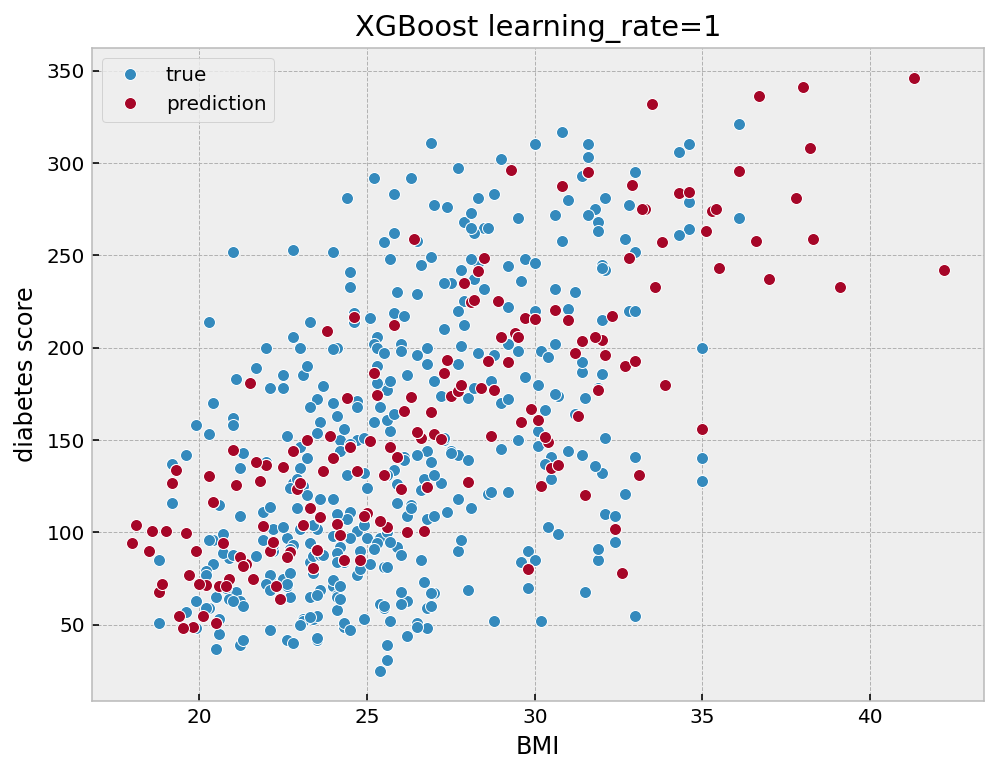

In [184]:
model = XGBRegressor(learning_rate=1, seed=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score');
plt.title(f'XGBoost learning_rate={model.learning_rate}')
plt.legend();

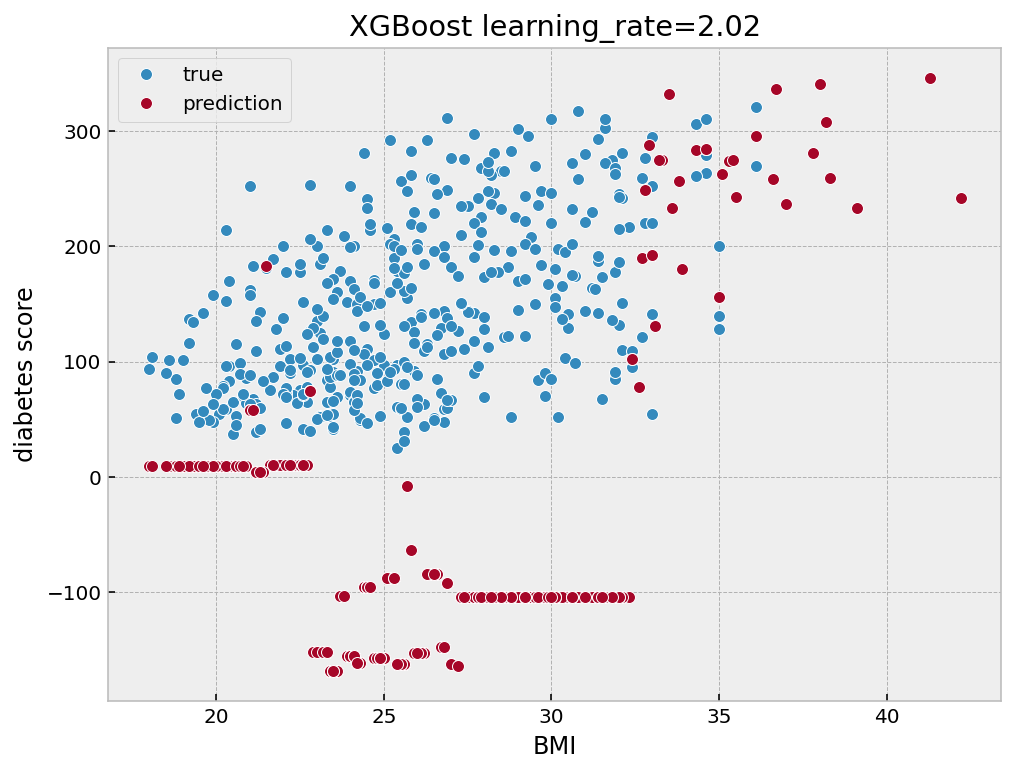

In [185]:
model = XGBRegressor(learning_rate=2.02, seed=0)

model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y,  'o', label='true')
plt.plot(X, y_pred,  'o', label='prediction')
plt.xlabel('BMI')
plt.ylabel('diabetes score');
plt.title(f'XGBoost learning_rate={model.learning_rate}')
plt.legend();

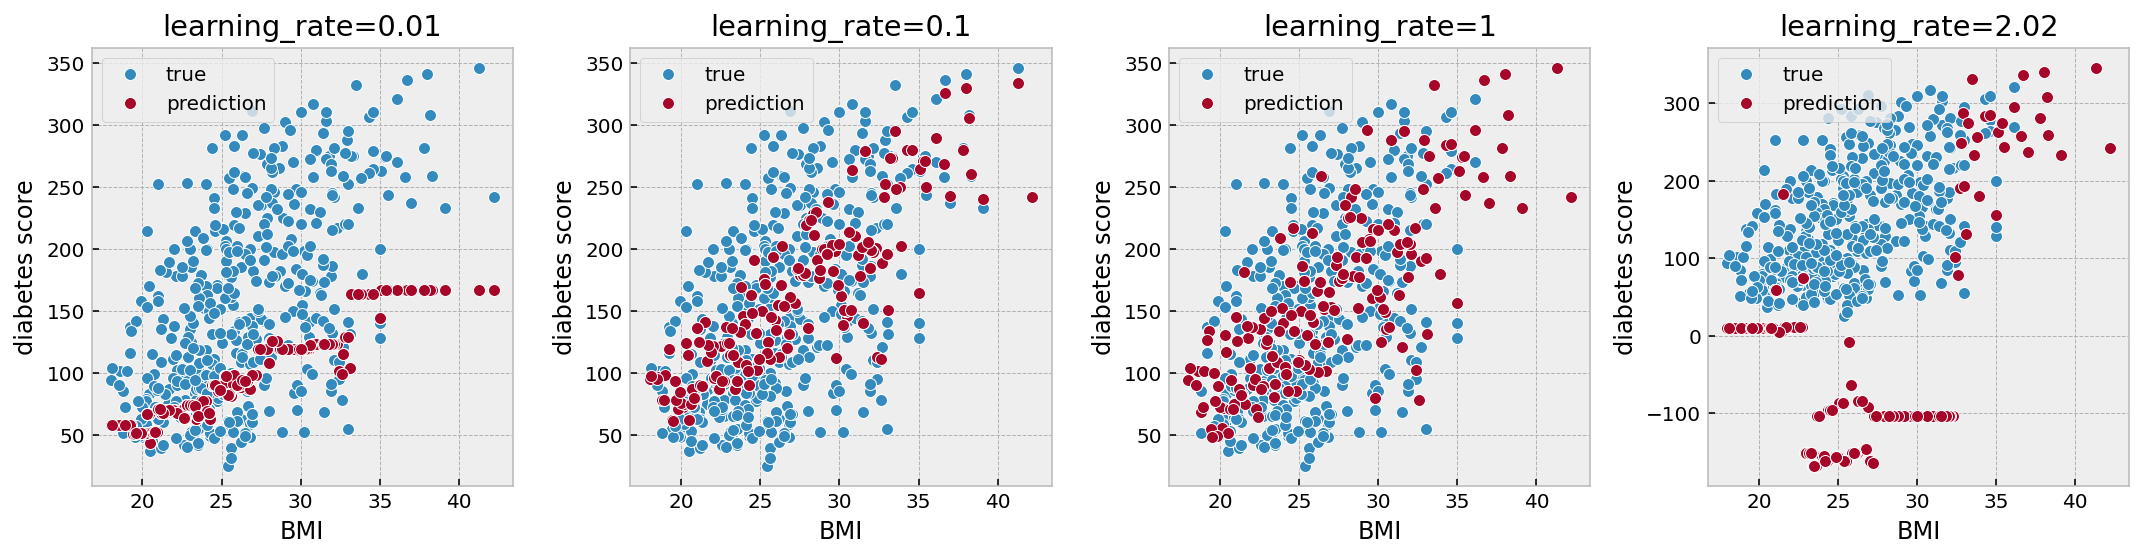

In [186]:
plt.figure(figsize=[15,4])
for i, lr in enumerate([0.01, 0.1, 1, 2.02]):
    model = XGBRegressor(learning_rate=lr, seed=0)
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.subplot(1, 4, i+1)
    plt.plot(X, y,  'o', label='true')
    plt.plot(X, y_pred,  'o', label='prediction')
    plt.xlabel('BMI')
    plt.ylabel('diabetes score');
    plt.title(f'learning_rate={model.learning_rate}')
    plt.legend()
plt.tight_layout();

Let's add more features for the model to predict with.

In [187]:
X = Xdf2.to_numpy()
y = df.DIS.to_numpy()

X.shape, y.shape

((442, 10), (442,))

In [188]:
Xs = (X - X.mean(axis=0)) / X.std(axis=0)

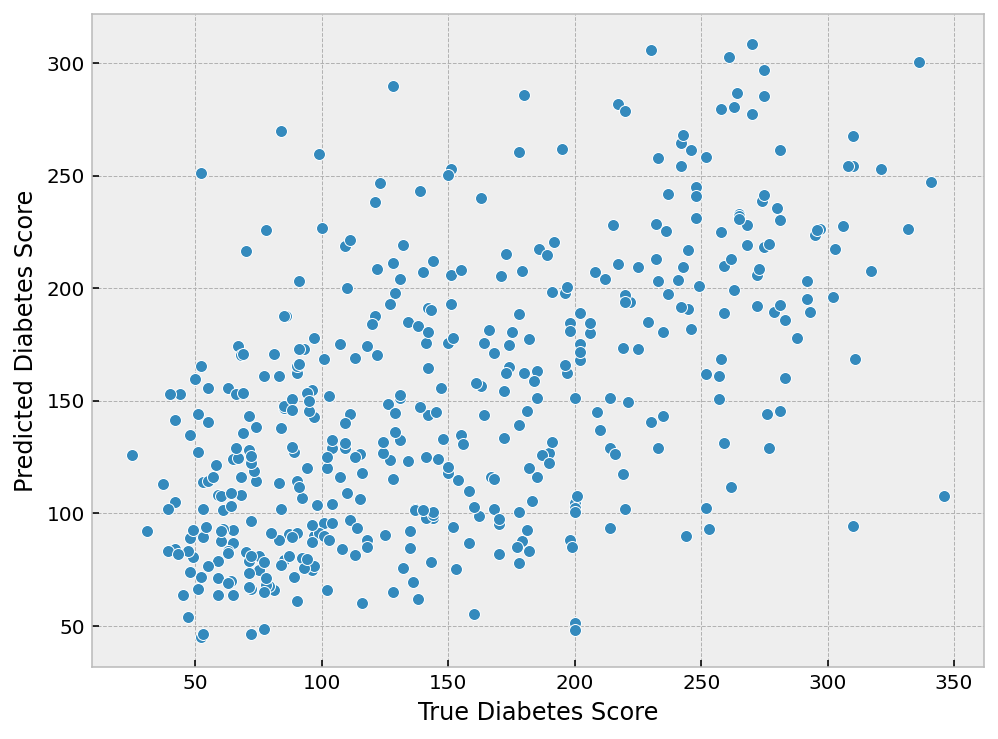

In [189]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_predict

model = XGBRegressor(seed=0)

kf = KFold(n_splits=10, shuffle=True, random_state=1)
y_pred = cross_val_predict(model, Xs, y, cv=kf)

plt.plot(y, y_pred, 'o')
plt.xlabel('True Diabetes Score')
plt.ylabel('Predicted Diabetes Score');

Tune a few hyperparameters for XGBoost.

In [190]:
from sklearn.model_selection import RandomizedSearchCV

model = XGBRegressor(seed=0)
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': np.arange(0.05, 0.25, 0.05),
              'max_depth': np.arange(2, 5),
              'gamma': [0.01, 0.1, 1, 10],
              'lambda': np.arange(0.1, 2, 0.1),
              'alpha': np.arange(0.1, 2, 0.1)}
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv = RandomizedSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')
cv.fit(Xs, y)
cv.best_params_

{'n_estimators': 200,
 'max_depth': 2,
 'learning_rate': 0.05,
 'lambda': 1.5000000000000002,
 'gamma': 1,
 'alpha': 1.0}

Get predictions from validation folds.

In [191]:
model = cv.best_estimator_
kf = KFold(n_splits=10, shuffle=True, random_state=1)
y_pred2 = cross_val_predict(model, Xs, y, cv=kf)

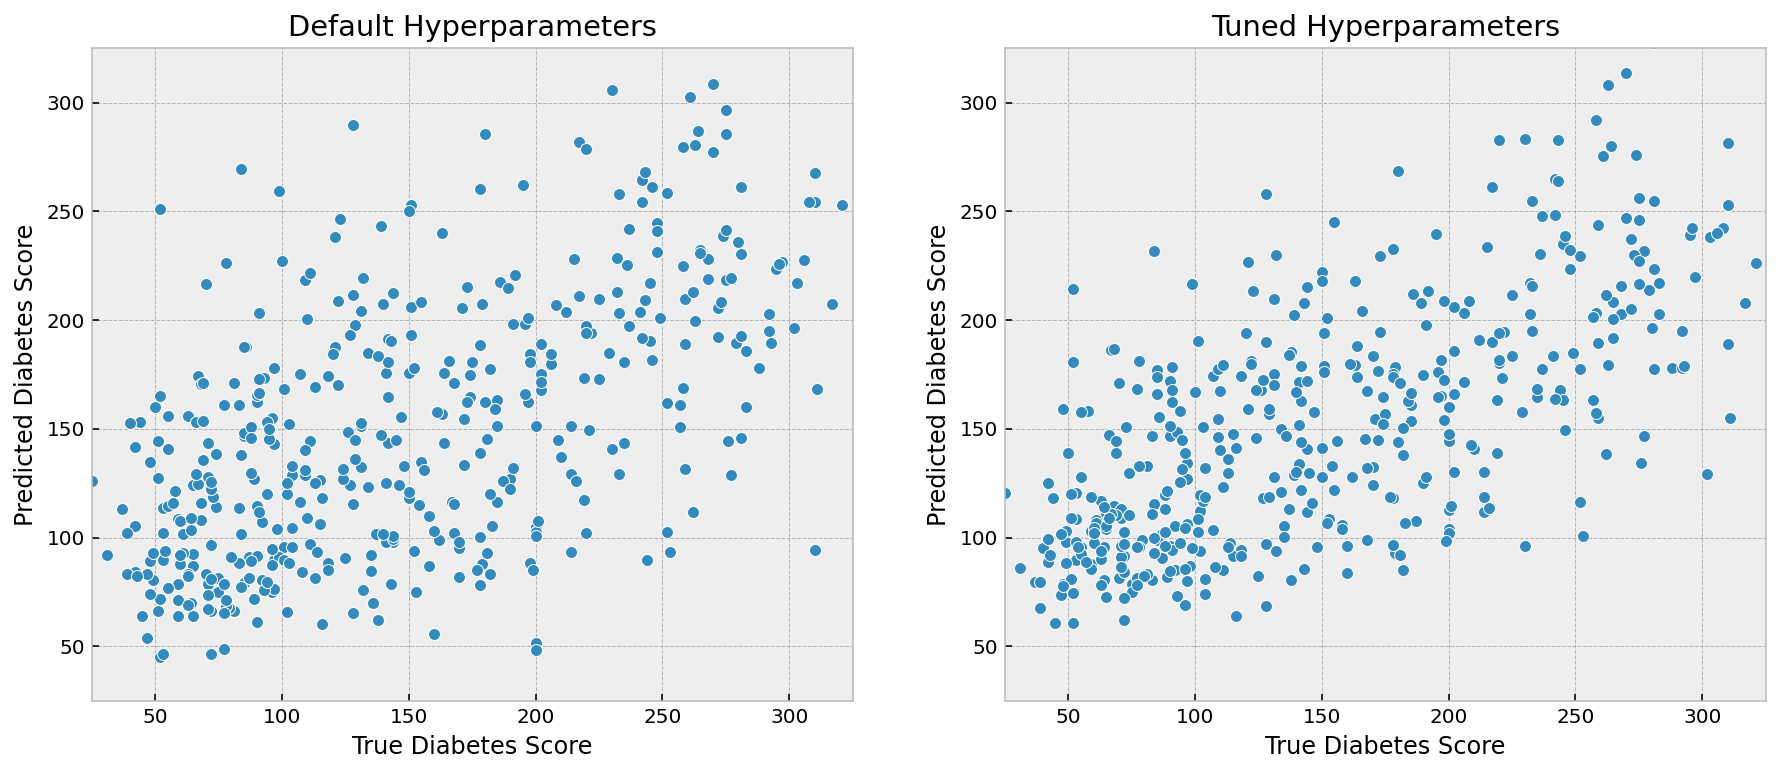

In [192]:
# default vs. tuned hyperparameters
plt.figure(figsize=[15,6])
plt.subplot(121)
plt.plot(y, y_pred, 'o', label='default hyperparameters')
plt.xlim([25, 325])
plt.ylim([25, 325])
plt.xlabel('True Diabetes Score')
plt.ylabel('Predicted Diabetes Score')
plt.title('Default Hyperparameters')
plt.subplot(122)
plt.plot(y, y_pred2, 'o', label='tuned hyperparameters')
plt.xlim([25, 325])
plt.ylim([25, 325])
plt.xlabel('True Diabetes Score')
plt.ylabel('Predicted Diabetes Score')
plt.title('Tuned Hyperparameters');

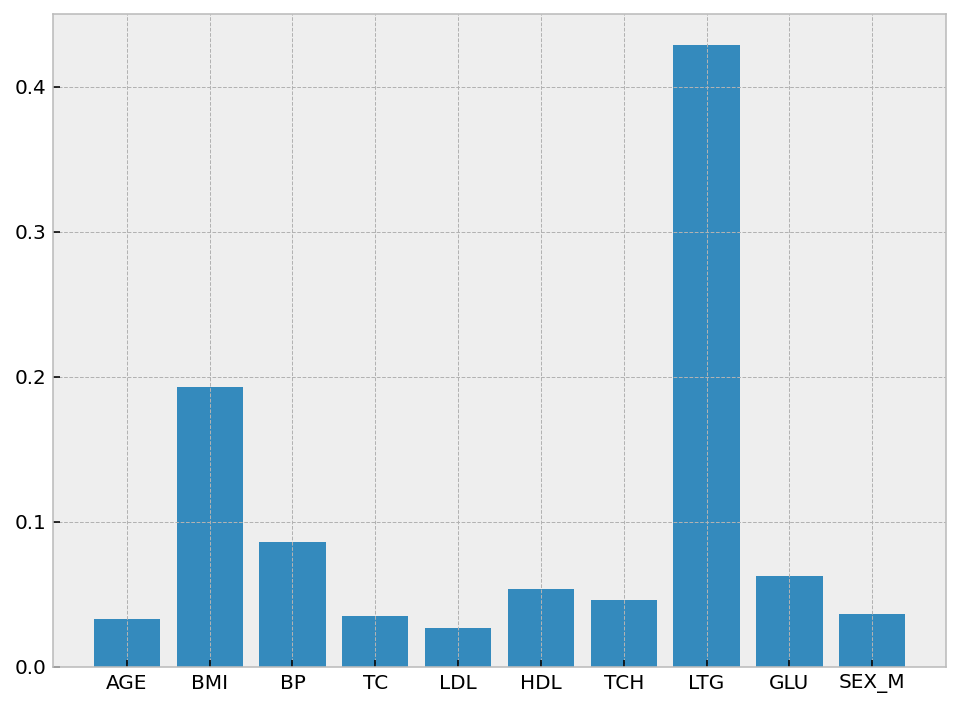

In [193]:
nfeatures = len(model.feature_importances_)
x = np.arange(nfeatures)
plt.bar(x, model.feature_importances_)
plt.xticks(x, Xdf2.columns);

### XGBoost for classification

### Example revisited

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [194]:
import pandas as pd
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


First, throw out features and data points with missing measurements.

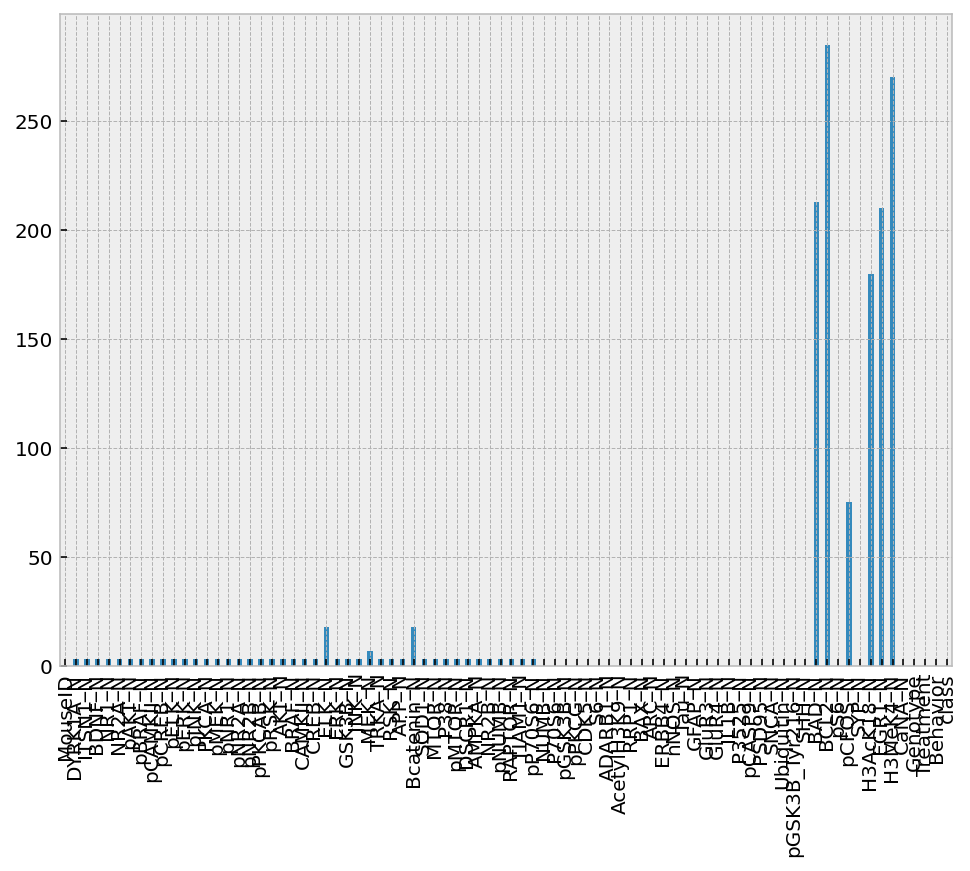

In [195]:
df.isnull().sum().plot.bar();

In [196]:
miss_too_many = df.isnull().sum() > 10

miss_too_many

MouseID      False
DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

In [197]:
miss_too_many.sum()

8

In [198]:
df2 = df.loc[:, ~miss_too_many]

df.shape, df2.shape

((1080, 82), (1080, 74))

In [199]:
df2 = df2.dropna()

df2.shape

(1073, 74)

In [200]:
df2

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [201]:
expr = df2.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
genotype = df2['Genotype']
treatment = df2['Treatment']
behavior = df2['Behavior']
mouse_class = df2['class']

In [202]:
X = expr.to_numpy()
y = mouse_class.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

`xgboost` does not like string labels, so you'll need to convert your class string labels into integer labels.

In [203]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
yint = le.fit_transform(y)
ylabels = le.inverse_transform(np.unique(yint))

y, yint, np.unique(yint), ylabels

(array(['c-CS-m', 'c-CS-m', 'c-CS-m', ..., 't-SC-s', 't-SC-s', 't-SC-s'],
       dtype=object),
 array([0, 0, 0, ..., 7, 7, 7]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

In [205]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = XGBClassifier(n_estimators=100)
# model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(model, X, yint, cv=kf, scoring='accuracy')
accuracy

array([0.99074074, 0.92592593, 0.97222222, 0.98130841, 0.96261682,
       0.99065421, 0.99065421, 0.98130841, 0.98130841, 1.        ])

Similar to random forest, this is a definite improvement right off the bat from a single decision tree.

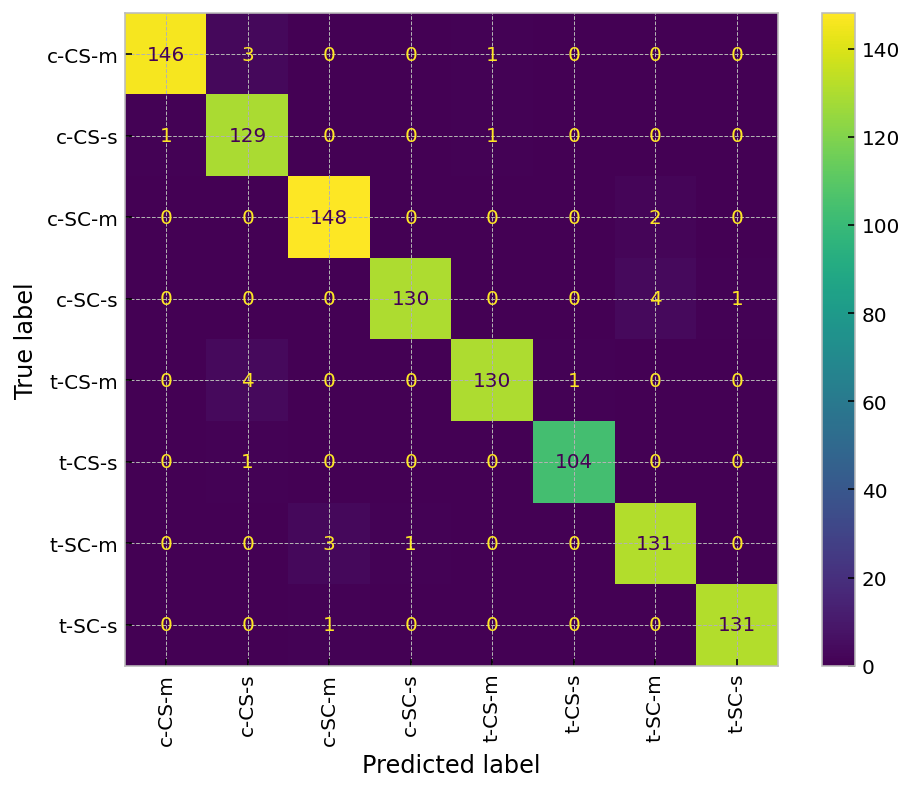

In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = cross_val_predict(model, X, yint, cv=kf)

cm = confusion_matrix(yint, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ylabels)
cmd.plot(xticks_rotation='vertical');

Tune a few hyperparameters.

In [223]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': np.arange(0.05, 0.25, 0.05),
              'max_depth': np.arange(2, 5),
              'gamma': np.arange(0.001, 0.012, 0.002),
              'lambda': np.logspace(-5, -3, 20),
              'alpha': np.arange(0.1, 2, 0.1)}
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv = RandomizedSearchCV(model, param_grid, cv=kf, scoring='accuracy')
cv.fit(X, yint)
cv.best_params_

{'n_estimators': 300,
 'max_depth': 2,
 'learning_rate': 0.2,
 'lambda': 8.858667904100833e-05,
 'gamma': 0.009000000000000001,
 'alpha': 1.0}

Tuning the hyperparameters maybe helped, but only slightly at most.

Perhaps other hyperparameters might be important?

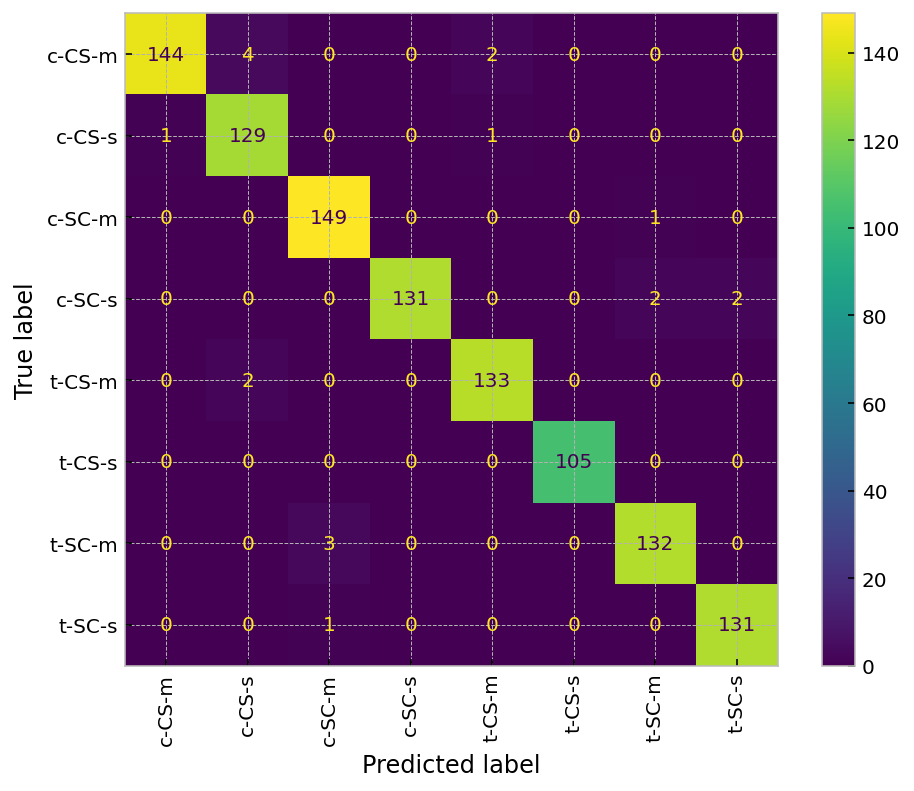

In [224]:
model = cv.best_estimator_

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = cross_val_predict(model, X, yint, cv=kf)

cm = confusion_matrix(yint, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ylabels)
cmd.plot(xticks_rotation='vertical');